In [1]:
from builtins import (super)
import numpy as np
import pylab

In [2]:
class BaseClass(object):
    """
    define the class interfaces
    """ 
    def __init__(self):
        """
        This method is called the constructor and gets called when the class is instantiated.  Commonly use to initialise data members.
        """
        self._x = None # single underscore in python, by convention, denotes a private member.  i.e. not supposed to be accessed directly
        self._y = None
        
    def set_x(self, x):
        """
        Setter method for _x.  We can intercept the varialble assignments and do some checks.  And protection.
        """
        if isinstance(x, (int, float, complex)):
            self._x = x
        else:
            raise Exception('y is not a number')
            
    def set_y(self, y):
        """
        Setter method for _x.  We can intercept the varialble assignments and do some checks.
        """
        if isinstance(y, (int, float, complex)):
            self._y = y
        else:
            raise Exception('y is not a number')
                

    def get_x(self):
        """
        Accessor method for _x
        
        :return: 
        """
        return self._x
    
    def get_y(self):
        """
        Accessor method for _y
        
        :return: 
        """
        return self._y

In [3]:
class DerivedClass(BaseClass):
    """
    This class will inherit the base_class methods and data members.
    
    """
    def __init__(self, x=0, y=0):
        self._x = x
        self._y = y

In [4]:
a = DerivedClass()

In [5]:
a.get_x()

0

In [6]:
b = DerivedClass(x = 2.2)
b.get_x()

2.2

In [7]:
a.set_x(4.2)
a.get_x()

4.2

In [8]:
b.set_x('3')

Exception: y is not a number

In [9]:
class PolynomialClass(DerivedClass):
    """
    A simple polynomial class for generating a number of poly nomial functions 
    of the form Ax^2 +Bx + C
    """
    def __init__(self, A, B, C):   # x=0, y=0
        """
        Class constructor
        """
        super().__init__() # super() used with a non-newstyle class
        self._A = A
        self._B = B
        self._C = C
        
    def run(self, x=0):
        """
        Evaluate the function
        """
        self._x = x
        self._y = self._A * self._x**2 + self._B * self._x + self._C
        return self._y

    def error(self, guess):
        """
        Find the absolute difference between evaluating the function and our guess for the function.
        """
        
        return abs(guess - self.run())

In [10]:
a_poly = PolynomialClass(2, 3, 5)

In [11]:
a_poly.run(np.linspace(-2.5, 2.5, 20))

array([ 10.        ,   8.29639889,   6.86980609,   5.72022161,
         4.84764543,   4.25207756,   3.93351801,   3.89196676,
         4.12742382,   4.6398892 ,   5.42936288,   6.49584488,
         7.83933518,   9.4598338 ,  11.35734072,  13.53185596,
        15.9833795 ,  18.71191136,  21.71745152,  25.        ])

Even though we have called run(), we can still get the internal state of our object using our accessor method.

In [12]:
a_poly.get_x()

array([-2.5       , -2.23684211, -1.97368421, -1.71052632, -1.44736842,
       -1.18421053, -0.92105263, -0.65789474, -0.39473684, -0.13157895,
        0.13157895,  0.39473684,  0.65789474,  0.92105263,  1.18421053,
        1.44736842,  1.71052632,  1.97368421,  2.23684211,  2.5       ])

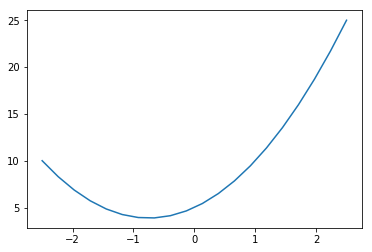

In [13]:
pylab.plot(a_poly.get_x(), a_poly.get_y())
pylab.show()

In [14]:
class base_solver():
    """
    A generic numerical solver
    """
    
    def __init__(self, learn_rate=0.00000001, max_iterations=10):
        """
        Class constructor
        """
        
        #place holders.  we will append our updates values to check later. 
        self.guess = []  # no _ so we allow others to access these directly
        self.err = []
        self.max_iterations = max_iterations
        
        
        if isinstance(init_guess, (int)):
            self._learn_rate = learn_rate
        else:
            raise Exception('The initial guess is not a number')
        
            
        if isinstance(init_guess, (int, float)):
            self._learn_rate = learn_rate
        else:
            raise Exception('The initial guess is not a number')
            
    def solve(self, func, init_guess):
        """
        This will be overridden.  We declare it in our base class to tell other developers this is what we expect to see.
        
        """
        if isinstance(init_guess, (int, float)):
            self._init_guess = init_guess
        else:
            raise Exception('The initial guess is not a number')
        
    def dummy(self):
        pass


In [34]:
class newton_solve(base_solver):
    """
    Dan hybrid Newton solver.
    
    https://en.wikipedia.org/wiki/Newton%27s_method
    
    """
    def __init__(self, learn_rate=0.00000001, max_iterations=200):
        super.__init__()
        
        self.guess = []  # no _ so we allow others to access these directly
        self.err = []
        self.max_iterations = max_iterations
        self.learn_rate = learn_rate
    
    def del_func(self, func, x):
        """
        
        """
        h = 0.0001
        #del_f = (func.run(x + self.learn_rate) - func.run(x)) / self.learn_rate
        del_f = (func.run(x + h) - func.run(x)) / h
        
        return del_f
    
    
    def x_next(self, func, x):
        """
        reutrn x+1 given x
        """
        
        x_n = x - func.run(x) / (self.del_func(func, x) + 0.00000000000000000001)
        # x_n = self.learn_rate * self.del_func(func, x) 
        
        return x_n
        
    
    def solve(self, func, init_guess):
        if isinstance(init_guess, (int, float)):
            self._init_guess = init_guess
        else:
            raise Exception('The initial guess is not a number')
            
        self.guess.append(self._init_guess)
            
        #first guess
        self.err.append(func.error(self._init_guess))
        
        for item in range(self.max_iterations):
            self.guess.append(self.x_next(func, self.guess[item - 1]))
            self.err.append(func.error(self.guess[item]))
            
            ### Check the difference between our errors.  are they getting smaller
            diff_err = self.err[item] - self.err[item - 1]
            
            #if diff_err <= 0:  # we are getting smaller so reduce the learn rate
                #self.learn_rate -= 0.0001
                
        return func.run(self.guess[-1])
            
 

In [35]:
dan_solver = newton_solve()


In [36]:
dan_solver.solve(a_poly, 0.0)

4.182036292652501

In [31]:
[dan_solver.guess, dan_solver.err]

[[0.0,
  -1.6665555629620945,
  -1.6665555629620945,
  -0.15124883038800285,
  -0.15124883038800285,
  -2.0684152285381803,
  -2.0684152285381803,
  -0.674371061086041,
  -0.674371061086041,
  -13.512947845291666,
  -13.512947845291666,
  -7.055545314148483,
  -7.055545314148483,
  -3.749111827834448,
  -3.749111827834448,
  -1.926513231437527,
  -1.926513231437527,
  -0.5147889654411333,
  -0.5147889654411333,
  -4.750135958863318,
  -4.750135958863318],
 [5.0,
  5.0,
  6.6665555629620945,
  6.6665555629620945,
  5.151248830388003,
  5.151248830388003,
  7.06841522853818,
  7.06841522853818,
  5.674371061086041,
  5.674371061086041,
  18.512947845291666,
  18.512947845291666,
  12.055545314148482,
  12.055545314148482,
  8.749111827834447,
  8.749111827834447,
  6.926513231437527,
  6.926513231437527,
  5.5147889654411335,
  5.5147889654411335,
  9.750135958863318]]

In [27]:
#dan_solver.err



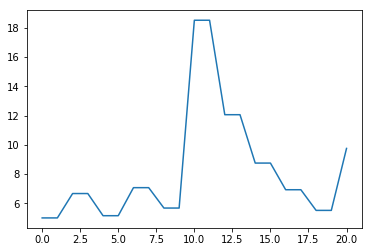

In [28]:
pylab.plot(dan_solver.err)
pylab.show()

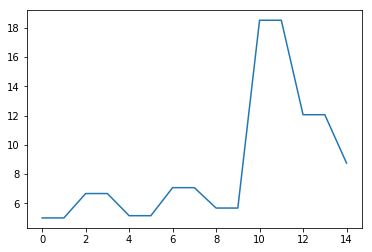

In [29]:
pylab.plot(dan_solver.err[0:15])
pylab.show()

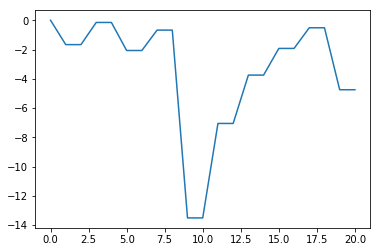

In [30]:
pylab.plot(dan_solver.guess)
pylab.show()

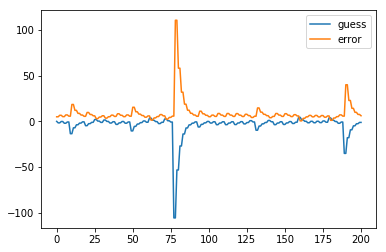

In [37]:
pylab.plot(dan_solver.guess, label='guess')
pylab.plot(dan_solver.err, label='error')
pylab.legend()
pylab.show()